 ### Needs to run only once to create the labels for each image (in this case I only did label 100 images manually and we will use albumentations library to generate 60 times more images for our deep learning model

In [144]:
!labelme

# Imports

In [1]:
import tensorflow as tf
import cv2
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
from tqdm import tqdm
import os

## GPU Memory Limit

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Face Detection

## Reading images as a Tensorflow data pipeline

In [4]:
images = tf.data.Dataset.list_files('data\\train\\images\\*.jpg')

In [5]:
images.as_numpy_iterator().next() #making sure that the tensorflow sees the input images

b'data\\train\\images\\Bill_Gates_0014.jpg'

In [6]:
def load_image(path): #reading the images from the given path as bytes and decoding them to create a tensorflow data pipeline
    byte = tf.io.read_file(path)
    image = tf.io.decode_jpeg(byte)
    return image

In [7]:
images = images.map(load_image) 

In [8]:
images.as_numpy_iterator().next()

array([[[218, 204, 191],
        [214, 200, 187],
        [216, 203, 187],
        ...,
        [ 50,  43,  37],
        [ 47,  40,  34],
        [ 47,  40,  34]],

       [[215, 201, 188],
        [212, 199, 183],
        [213, 200, 184],
        ...,
        [ 46,  39,  33],
        [ 46,  39,  33],
        [ 46,  39,  33]],

       [[210, 197, 181],
        [207, 194, 178],
        [209, 196, 180],
        ...,
        [ 45,  38,  32],
        [ 46,  39,  33],
        [ 46,  39,  33]],

       ...,

       [[ 10,  13,  22],
        [ 10,  13,  22],
        [ 10,  13,  20],
        ...,
        [ 35,  36,  41],
        [ 35,  34,  39],
        [ 37,  37,  39]],

       [[ 11,  14,  21],
        [ 10,  13,  20],
        [ 10,  13,  20],
        ...,
        [ 37,  38,  43],
        [ 36,  35,  40],
        [ 36,  35,  40]],

       [[ 11,  14,  21],
        [ 10,  13,  20],
        [  9,  12,  19],
        ...,
        [ 37,  38,  43],
        [ 36,  35,  40],
        [ 36,  35,  40]]

In [9]:
random_images = images.batch(5).as_numpy_iterator()

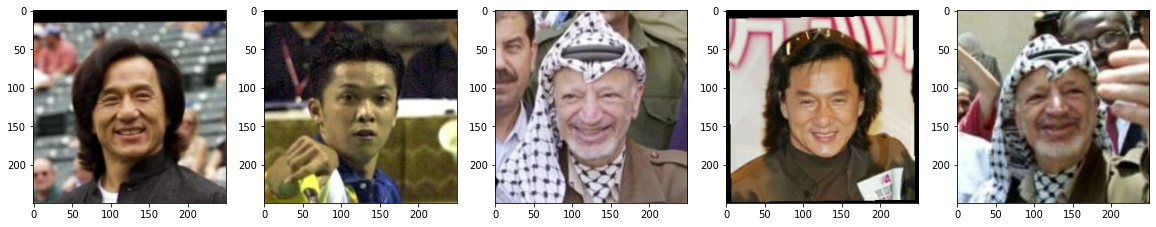

In [10]:
plot_random_images = random_images.next()
fig, ax = plt.subplots(ncols = 5, figsize=(20,20))
for idx, image in enumerate(plot_random_images):
    ax[idx].imshow(image)
plt.show()

For this project I manually splited the data myself by randomly selected images by hand as 70% as train 15% as test and 15% as validation sets. But for the labels of the selected images the script at the next cell will help

In [11]:
for dataset in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', dataset, 'images')):
        image_name = image.split('.')[0]+'.json'
        existing_labelpath = os.path.join('data', 'labels', image_name)
        if os.path.exists(existing_labelpath):
            new_labelpath = os.path.join('data', dataset, 'labels', image_name)
            os.replace(existing_labelpath, new_labelpath)

## Trying and testing albumentation on only one image

In [12]:
img = cv2.imread(os.path.join('data', 'train', 'images', 'Abdullah_Gul_0011.jpg'))

In [13]:
img

array([[[2, 1, 0],
        [2, 1, 0],
        [2, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 5],
        [0, 0, 4],
        [0, 0, 6],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 3, 0],
        [2, 3, 0],
        [4, 2, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 3, 0],
        [2, 3, 0],
        [4, 3, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 3, 0],
        [2, 3, 0],
        [4, 3, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
with open(os.path.join('data', 'train', 'labels', 'Abdullah_Gul_0011.json'), 'r') as f:
    label = json.load(f)

In [15]:
label['shapes'][0]['points']

[[70.72538860103627, 33.54922279792746],
 [192.48704663212436, 193.9119170984456]]

In [16]:
coordinates = np.array(label['shapes'][0]['points']).reshape(4,)

In [17]:
coordinates

array([ 70.7253886 ,  33.5492228 , 192.48704663, 193.9119171 ])

In [18]:
coordinates = list(np.divide(coordinates, [250,250,250,250]))

In [19]:
coordinates

[0.2829015544041451,
 0.13419689119170986,
 0.7699481865284974,
 0.7756476683937824]

In [20]:
import albumentations as alb

In [21]:
transform = alb.Compose([alb.RandomCrop(width=175, height=175), alb.HorizontalFlip(p=0.5), alb.RandomBrightnessContrast(p=0.3), alb.RandomGamma(p=0.3), alb.RGBShift(p=0.3), alb.VerticalFlip(p=0.5)], 
                         bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']));
#

In [22]:
augmented_image = transform(image=img, bboxes=[coordinates], class_labels=['face'])

In [23]:
augmented_image['image']

array([[[131, 137, 156],
        [147, 154, 173],
        [154, 164, 181],
        ...,
        [154, 162, 179],
        [174, 182, 199],
        [192, 200, 217]],

       [[141, 147, 166],
        [155, 161, 180],
        [158, 166, 183],
        ...,
        [164, 172, 189],
        [185, 193, 210],
        [200, 208, 225]],

       [[148, 153, 174],
        [158, 164, 183],
        [157, 165, 182],
        ...,
        [176, 183, 202],
        [196, 203, 222],
        [210, 217, 234]],

       ...,

       [[  9,  10,  38],
        [ 20,  19,  45],
        [ 24,  22,  44],
        ...,
        [  7,   1,   2],
        [  6,   0,   1],
        [  6,   0,   1]],

       [[  7,   6,  38],
        [ 14,  12,  42],
        [ 15,  15,  39],
        ...,
        [  7,   1,   2],
        [  6,   0,   1],
        [  6,   0,   1]],

       [[  4,   3,  37],
        [  9,   6,  38],
        [  7,   6,  32],
        ...,
        [  7,   1,   2],
        [  7,   1,   2],
        [  7,   1,   2]]

In [24]:
augmented_image['bboxes']

[(0.08864544781643224, 0.0, 0.7844263508512213, 0.7652109548482605)]

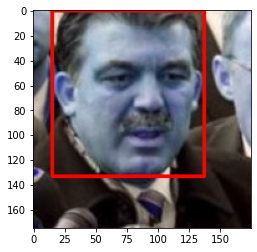

In [25]:
cv2.rectangle(augmented_image['image'],
              tuple(np.multiply(augmented_image['bboxes'][0][:2], [175,175]).astype(int)),
              tuple(np.multiply(augmented_image['bboxes'][0][2:], [175,175]).astype(int)), 
              (255,0,0), 2)
plt.imshow(augmented_image['image'])

## Applying albumenations to all of the images

In [26]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [250,250,250,250]))

        try: 
            for x in range(60):
                augmented = transform(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('augmented_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('augmented_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.7430051813471502, 0.13212435233160624, 0.3160621761658031, 0.8005181347150259, 'face'].
x_max is less than or equal to x_min for bbox [0.7575129533678757, 0.10414507772020726, 0.29948186528497417, 0.7466321243523316, 'face'].


Right now we have 100 * 60 total augmented images that are different than each other. We can use those images as the train, test and val to train a deep learnin model. Above cell needs to run only once when creating the augmented images. Running it more than once will add more augmented images with same names if wanted to add more images the augmented_data folder should be cleaned and subfolders train, train/images, train/labels, test, test/images, test/labels, val, val/images and val/labels should be recreated.

## Loading Train, Test and Val Images and Labels as TensorFlow data pipeline

In [27]:
train_images = tf.data.Dataset.list_files('augmented_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [28]:
test_images = tf.data.Dataset.list_files('augmented_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [29]:
val_images = tf.data.Dataset.list_files('augmented_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [30]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = 'utf-8') as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [31]:
train_labels = tf.data.Dataset.list_files('augmented_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
test_labels = tf.data.Dataset.list_files('augmented_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
val_labels = tf.data.Dataset.list_files('augmented_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [34]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2161 , 0.11456, 0.869  , 0.914  ], dtype=float16))

In [35]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4080, 4080, 900, 900, 900, 900)

## Creating the final dataset and visualizing the dataset

In [36]:
train = tf.data.Dataset.zip((train_images, train_labels)).shuffle(5500).batch(8).prefetch(4)
test = tf.data.Dataset.zip((test_images, test_labels)).shuffle(1500).batch(8).prefetch(4)
val = tf.data.Dataset.zip((val_images, val_labels)).shuffle(1500).batch(8).prefetch(4)

In [37]:
res = train.as_numpy_iterator().next()
sample_img = res[0][idx]
sample_coordinates = res[1][1][idx]

In [38]:
sample_img

array([[[0.5652744 , 0.4358626 , 0.36919594],
        [0.58654   , 0.4571283 , 0.39046162],
        [0.5529412 , 0.4223856 , 0.35457516],
        ...,
        [0.5851837 , 0.53773165, 0.5457058 ],
        [0.56877553, 0.5283241 , 0.53286356],
        [0.4263908 , 0.38484493, 0.39575702]],

       [[0.4750817 , 0.34566996, 0.28439543],
        [0.4962929 , 0.36688113, 0.30189952],
        [0.48213848, 0.35236928, 0.28455883],
        ...,
        [0.54866713, 0.49489373, 0.49791658],
        [0.4030484 , 0.3530484 , 0.35511643],
        [0.18663551, 0.14202768, 0.14325316]],

       [[0.38748294, 0.2586431 , 0.19981958],
        [0.38844463, 0.25960475, 0.19617543],
        [0.33881396, 0.2103792 , 0.14322403],
        ...,
        [0.43585733, 0.37090808, 0.36862054],
        [0.27941686, 0.21797895, 0.2171926 ],
        [0.09742885, 0.04138309, 0.04138309]],

       ...,

       [[0.48331615, 0.48723772, 0.5656691 ],
        [0.5194546 , 0.52337617, 0.60180753],
        [0.5269693 , 0

In [39]:
sample_coordinates

array([0.4026, 0.    , 1.    , 0.704 ], dtype=float16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


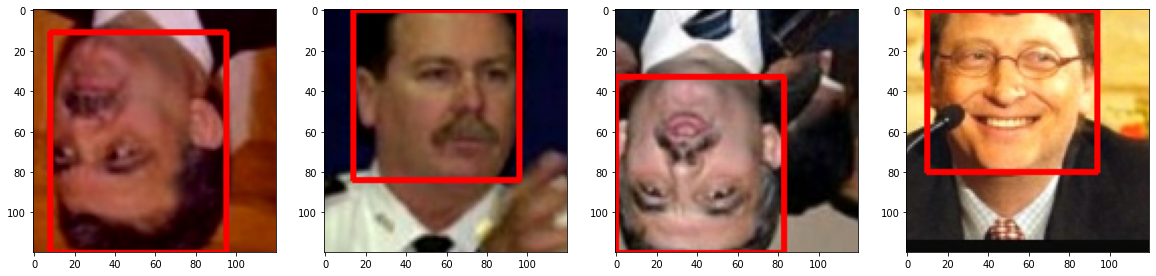

In [40]:
res = train.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
    sample_img = res[0][idx]
    sample_coordinates = res[1][1][idx]
    
    cv2.rectangle(sample_img,
                  tuple(np.multiply(sample_coordinates[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coordinates[2:], [120,120]).astype(int)), 
                  (255,0,0), 2)
    ax[idx].imshow(sample_img)

## Deep Learning Models

## VGG-16

In [67]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Input
from tensorflow.keras.models import Model

In [68]:
train_images.as_numpy_iterator().next().shape # basically the shape of the input layer

(120, 120, 3)

In [69]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0683 , 0.     , 0.81   , 0.744  ],
        [0.3171 , 0.0749 , 1.     , 1.     ],
        [0.4475 , 0.03766, 1.     , 1.     ],
        [0.3345 , 0.0661 , 0.9785 , 0.852  ],
        [0.359  , 0.293  , 1.     , 1.     ],
        [0.1455 , 0.05096, 0.8516 , 0.944  ],
        [0.     , 0.3442 , 0.72   , 1.     ],
        [0.1458 , 0.     , 0.933  , 0.903  ]], dtype=float16))

Our problem consist of one classification (to know if there is a face in the image or not) and one regression to detect where the face is. As we can see from the output of the previous cell we can see that one of them is the class which is 1 (face) or 0 (no face) and the other one is where the face is (coordinates in normalized form). For making vgg 16 work with our problem we will tweak the last part of the vgg model and include_top=False does not take the last part for us to modify it. The output layers for both classification and regression is 1 and 4 respectively as seen on the output of the previous cell. 

In [89]:
input_layer = Input(shape=(120,120,3))

vgg16 = VGG16(include_top=False)(input_layer) 

gmp2D_1 = GlobalMaxPooling2D()(vgg16)
classification_layer1 = Dense(2048, activation='relu', name='classification_dense')(gmp2D_1)
classification_layer2 = Dense(1, activation='sigmoid', name='classification_output')(classification_layer1)

gmp2D_2 = GlobalMaxPooling2D()(vgg16)
regression_layer1 = Dense(2048, activation='relu', name='regression_dense')(gmp2D_2)
regression_layer2 = Dense(4, activation='sigmoid', name='regression_output')(regression_layer1)

model = Model(inputs=input_layer, outputs=[classification_layer2, regression_layer2])

In [90]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_7[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_6 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [91]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [92]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = lr_decay)

In [93]:
class face_detector(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss,**kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        X, y = batch
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            total_loss = batch_localizationloss+0.5*batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        classes, coords = self.model(X, training=False)
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [94]:
model = face_detector(model)

In [95]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [96]:
model.compile(opt, tf.keras.losses.BinaryCrossentropy(), localization_loss)

In [97]:
hist = model.fit(train, validation_data=val, epochs=15)

Epoch 1/15
510/510 [==============================] - 24s 39ms/step - total_loss: 0.1706 - class_loss: 0.0138 - regress_loss: 0.1637 - val_total_loss: 0.0076 - val_class_loss: 9.2388e-06 - val_regress_loss: 0.0076
Epoch 2/15
510/510 [==============================] - 23s 40ms/step - total_loss: 0.0249 - class_loss: 3.7574e-05 - regress_loss: 0.0249 - val_total_loss: 0.0228 - val_class_loss: 1.4603e-06 - val_regress_loss: 0.0228
Epoch 3/15
510/510 [==============================] - 23s 40ms/step - total_loss: 0.0118 - class_loss: 9.7310e-06 - regress_loss: 0.0118 - val_total_loss: 0.0396 - val_class_loss: 6.4373e-06 - val_regress_loss: 0.0396
Epoch 4/15
510/510 [==============================] - 23s 40ms/step - total_loss: 0.0076 - class_loss: 4.7638e-06 - regress_loss: 0.0076 - val_total_loss: 0.0101 - val_class_loss: 8.9407e-08 - val_regress_loss: 0.0101
Epoch 5/15
510/510 [==============================] - 23s 40ms/step - total_loss: 0.0059 - class_loss: 3.2334e-06 - regress_loss: 0.

In [98]:
hist.history

{'total_loss': [0.04291008412837982,
  0.01808786951005459,
  0.00616172980517149,
  0.010477551259100437,
  0.0052871606312692165,
  0.006294683553278446,
  0.004835150204598904,
  0.004375657066702843,
  0.0028007803484797478,
  0.0027297581546008587,
  0.00126538029871881,
  0.0015111713437363505,
  0.000842949200887233,
  0.0024342122487723827,
  0.0009547231020405889],
 'class_loss': [0.0008766059763729572,
  5.02173224958824e-06,
  1.5006186004029587e-05,
  3.352763542352477e-07,
  2.4015405870159157e-05,
  9.387740647071041e-07,
  2.980232594040899e-08,
  7.286821073648753e-06,
  6.511898391181603e-06,
  4.544857858945761e-07,
  -0.0,
  1.981869218070642e-06,
  1.4901162970204496e-08,
  4.4703490686970326e-08,
  -0.0],
 'regress_loss': [0.04247178137302399,
  0.018085358664393425,
  0.0061542266048491,
  0.010477383621037006,
  0.005275153089314699,
  0.00629421416670084,
  0.00483513530343771,
  0.004372013732790947,
  0.002797524444758892,
  0.0027295309118926525,
  0.00126538

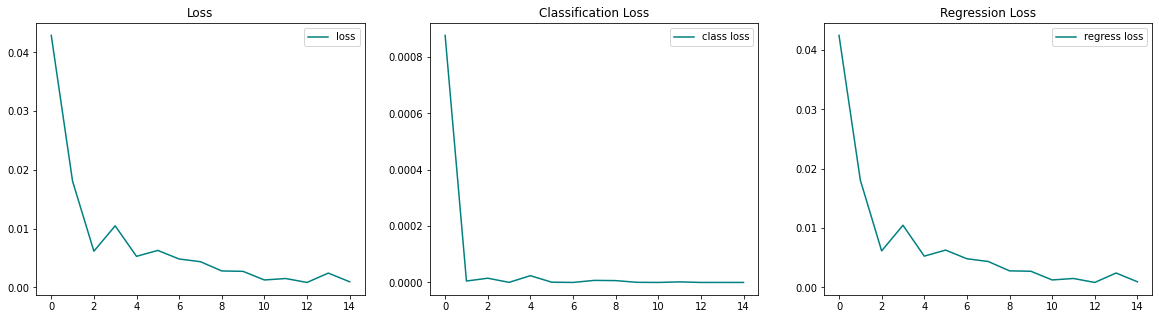

In [99]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
#ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
#ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
#ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


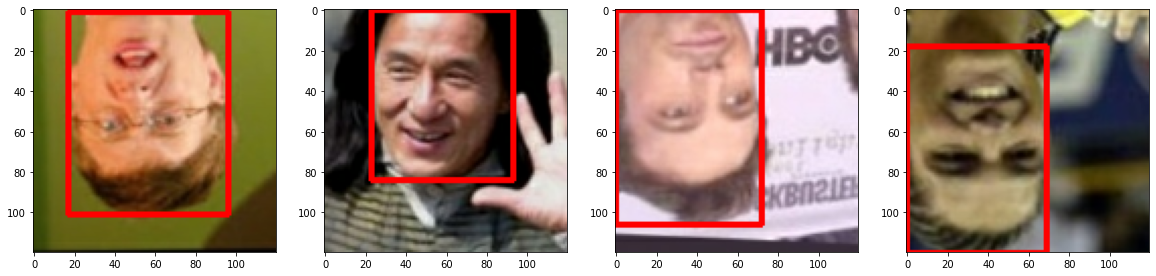

In [100]:
res = val.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
    sample_img = res[0][idx]
    sample_coordinates = res[1][1][idx]
    
    cv2.rectangle(sample_img,
                  tuple(np.multiply(sample_coordinates[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coordinates[2:], [120,120]).astype(int)), 
                  (255,0,0), 2)
    ax[idx].imshow(sample_img)

In [107]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
ypred = model.predict(test_sample[0])
ypred

[array([[1.0000000e+00],
        [2.1696140e-08],
        [1.0000000e+00],
        [9.9391864e-09],
        [1.0000000e+00],
        [9.9999666e-01],
        [1.0000000e+00],
        [1.0000000e+00]], dtype=float32),
 array([[2.3897997e-01, 1.3081322e-03, 9.3715453e-01, 8.0784923e-01],
        [4.4889493e-05, 6.0897768e-05, 3.8706959e-05, 1.0394496e-04],
        [2.9403442e-03, 1.5772417e-01, 6.2697679e-01, 9.9658561e-01],
        [1.8648261e-05, 2.7011693e-05, 2.3013024e-05, 5.6659206e-05],
        [1.3469149e-01, 1.9651675e-03, 8.3913577e-01, 8.9987928e-01],
        [1.0099972e-01, 8.8141643e-02, 7.7174485e-01, 7.6697165e-01],
        [1.8781862e-01, 2.5574216e-01, 9.0622437e-01, 9.9578995e-01],
        [2.1866860e-03, 2.3296714e-01, 6.3709295e-01, 9.9565458e-01]],
       dtype=float32)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


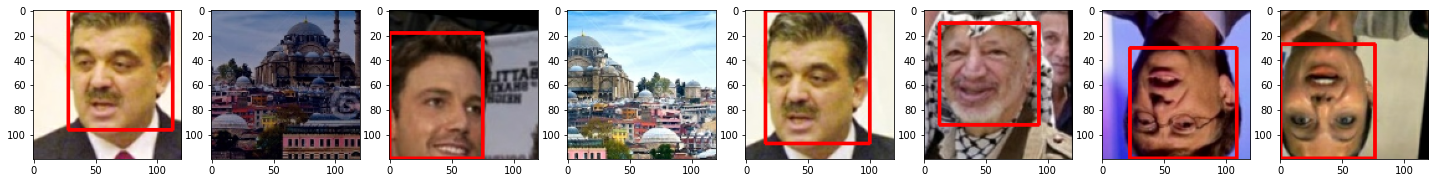

In [108]:
fig, ax = plt.subplots(ncols=8, figsize=(25,25))
for idx in range(8): 
    sample_image = test_sample[0][idx]
    sample_coords = ypred[1][idx]
    
    if ypred[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [204]:
model.save('face_detector', save_format="tf")

INFO:tensorflow:Assets written to: face_detector\assets


## Saved face_detector model initilization 

In [4]:
from tensorflow.keras.models import load_model
face_detector = load_model('face_detector')

face_detector.summary()

Model: "face_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        [(None, 1),               16826181  
                              (None, 4)]                         
                                                                 
Total params: 16,826,181
Trainable params: 16,826,181
Non-trainable params: 0
_________________________________________________________________


In [5]:
random_image = cv2.imread(r'C:/Users/PC/Desktop/Python projects/augmented_data_akif/images/Screenshot_1.jpg')
random_image_rgb = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
random_image.shape

(679, 745, 3)

In [6]:
random_image_resized = tf.image.resize(random_image_rgb, (120,120))
ypred_random_image = face_detector.predict(np.expand_dims(random_image_resized/255,0))
sample_coords = ypred_random_image[1][0]

if ypred_random_image[0] > 0.9:
    cv2.rectangle(random_image, 
                    tuple(np.multiply(sample_coords[:2], [random_image.shape[1],random_image.shape[0]]).astype(int)),
                    tuple(np.multiply(sample_coords[2:], [random_image.shape[1],random_image.shape[0]]).astype(int)), 
                        (255,0,0), 2)
    cv2.rectangle(random_image, 
                      tuple(np.add(np.multiply(sample_coords[:2], [random_image.shape[1],random_image.shape[0]]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [random_image.shape[1],random_image.shape[0]]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
    cv2.putText(random_image, 'face', tuple(np.add(np.multiply(sample_coords[:2], [random_image.shape[1],random_image.shape[0]]).astype(int),
                                            [0,-5])),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
cv2.imshow('face', random_image)
cv2.waitKey()

-1